In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(f'{os.getcwd()}/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/home/brian02oriel/Documents/PythonProjects/python-kaggle-competitions/Flood_prediction/dataset/train.csv
/home/brian02oriel/Documents/PythonProjects/python-kaggle-competitions/Flood_prediction/dataset/test.csv


In [2]:
train_df = pd.read_csv("./dataset/train.csv")
test_df = pd.read_csv("./dataset/test.csv")
train_df

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,7,8,7,2,2,1,4,6,4,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,9,4,4,3,7,4,9,4,5,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,5,5,5,5,6,5,5,2,4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,6,8,5,3,4,6,7,6,4,0.495


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [4]:
train_df.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [5]:
train_df.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [6]:
for col in train_df.columns:
    print(f'{col}: {train_df[col].unique()}')
    print(f'{col} min: {train_df[col].min()}')
    print(f'{col} max: {train_df[col].max()}')

id: [      0       1       2 ... 1117954 1117955 1117956]
id min: 0
id max: 1117956
MonsoonIntensity: [ 5  6  3  8  4  7  9  2 10  1  0 11 12 13 15 14 16]
MonsoonIntensity min: 0
MonsoonIntensity max: 16
TopographyDrainage: [ 8  7  5  4  3  6  2  1  9 10 12  0 11 14 13 16 15 17 18]
TopographyDrainage min: 0
TopographyDrainage max: 18
RiverManagement: [ 5  4  6  2  1  8  3  0  9  7 10 11 12 15 13 14 16]
RiverManagement min: 0
RiverManagement max: 16
Deforestation: [ 8  4  7  5  6  2  3  9  0 10  1 13 11 12 14 15 16 17]
Deforestation min: 0
Deforestation max: 17
Urbanization: [ 6  8  3  4  2  5 10  7  9 11  1  0 12 13 16 14 15 17]
Urbanization min: 0
Urbanization max: 17
ClimateChange: [ 4  8  7  5  6  3  2  1  0 10  9 12 11 13 14 15 16 17]
ClimateChange min: 0
ClimateChange max: 17
DamsQuality: [ 4  3  1  6  2  5  8  7  9 12 11 10  0 14 13 15 16]
DamsQuality min: 0
DamsQuality max: 16
Siltation: [ 3  5  7  6  4 10  8  1  2  9  0 11 14 12 13 15 16]
Siltation min: 0
Siltation max: 16
Agri

In [7]:
train_df[train_df['FloodProbability'] > 0.5]

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
7,7,6,6,5,7,5,5,3,5,5,...,5,3,5,5,8,6,8,5,6,0.595
8,8,5,2,8,5,4,5,2,4,5,...,9,2,7,3,4,6,4,5,5,0.505
10,10,3,7,2,6,6,3,2,3,3,...,9,5,2,5,4,5,8,8,5,0.515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117940,1117940,5,4,6,3,5,3,3,5,5,...,4,6,5,8,5,4,5,8,3,0.505
1117941,1117941,6,6,3,7,6,2,4,6,1,...,5,6,9,4,5,9,9,4,5,0.535
1117948,1117948,5,6,2,6,7,3,7,10,6,...,3,8,3,4,4,6,5,7,8,0.610
1117949,1117949,4,5,6,7,3,8,7,5,4,...,4,6,4,7,6,4,5,4,8,0.545


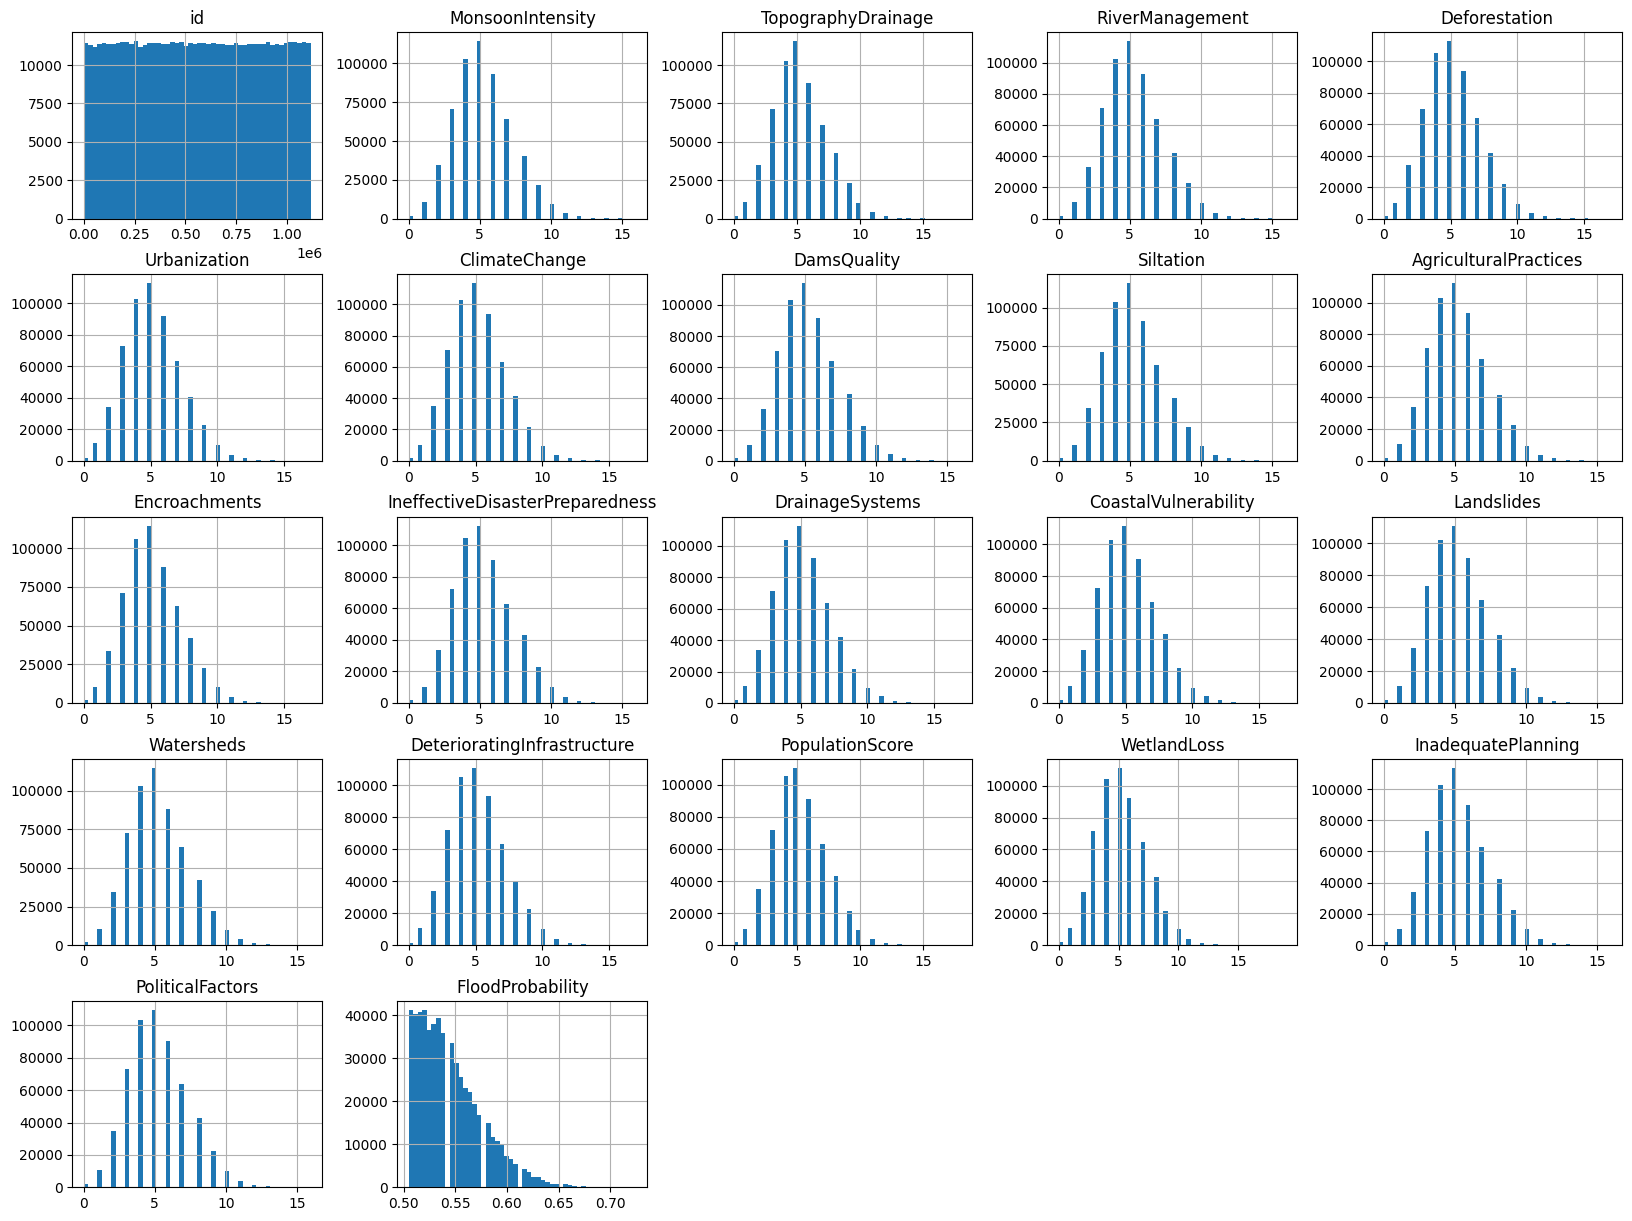

In [8]:
%matplotlib inline
# only in a Jupyter notebook
import matplotlib.pyplot as plt
train_df[train_df['FloodProbability'] > 0.5].hist(bins=50, figsize=(20,15))
plt.show()

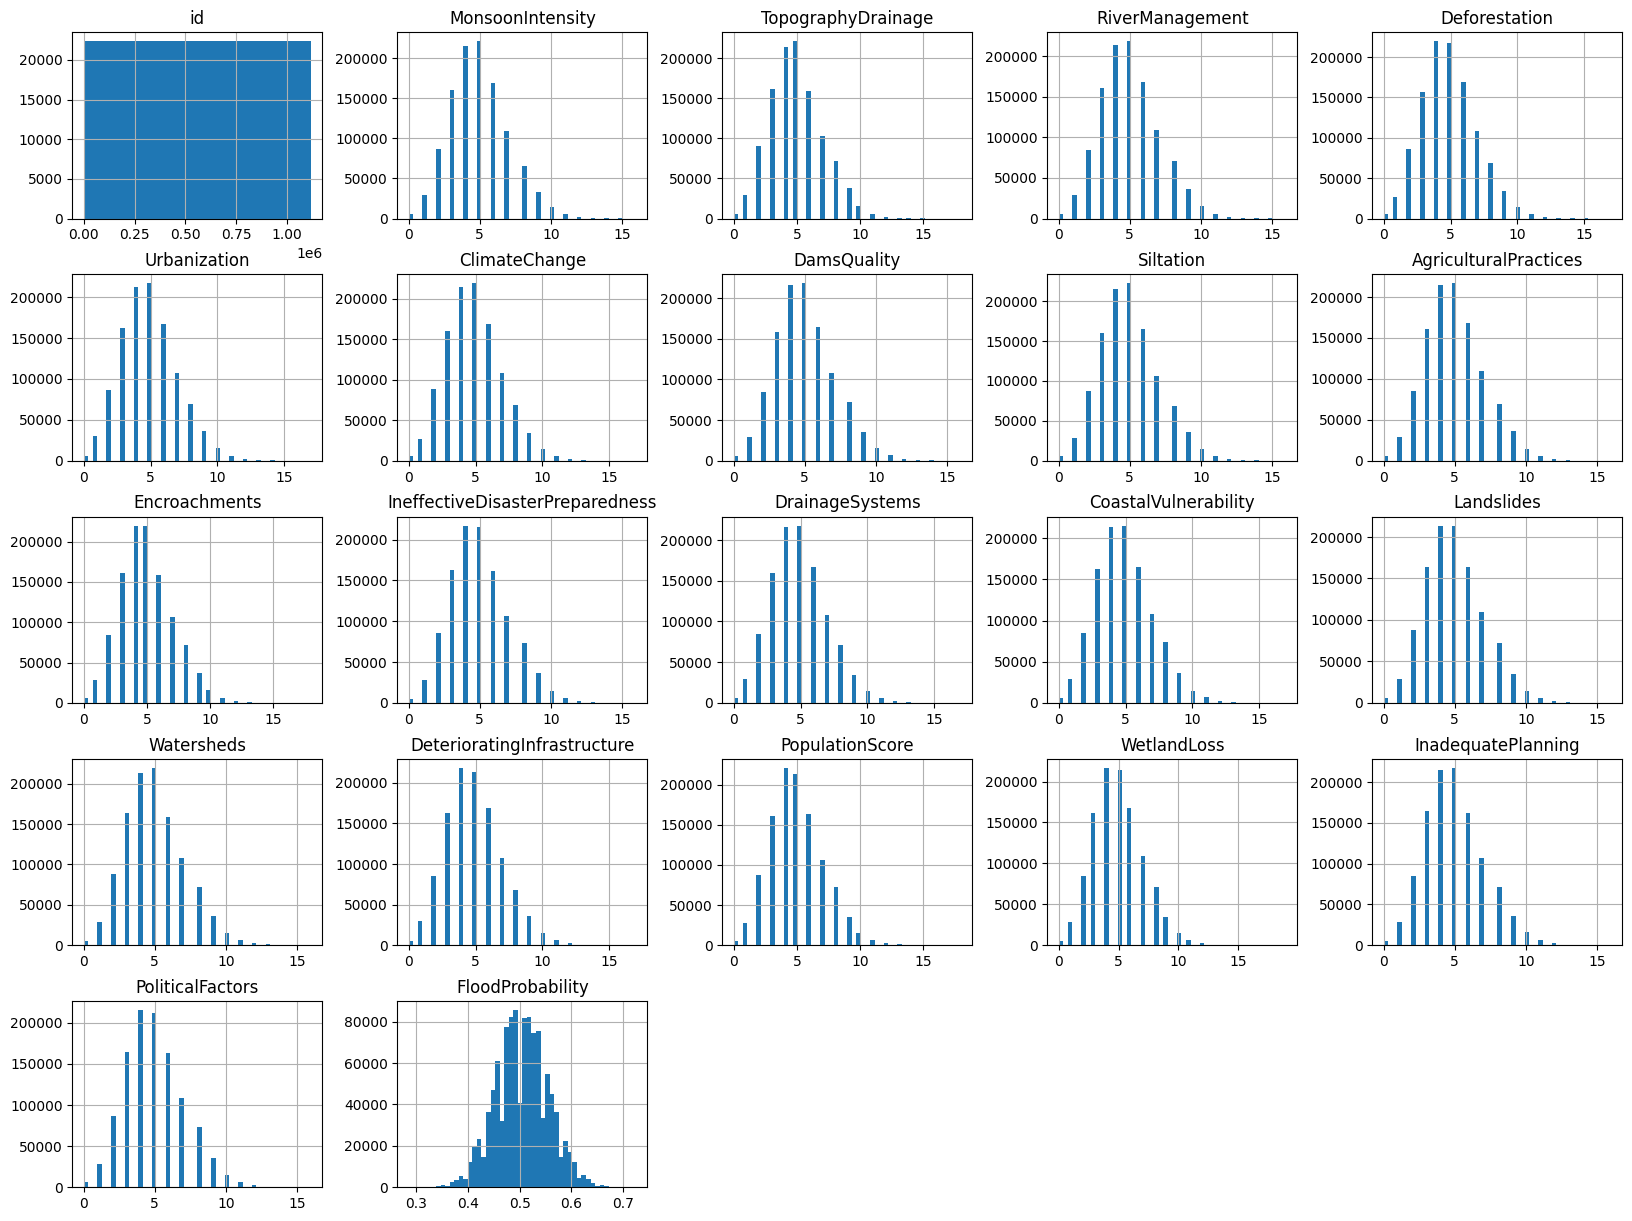

In [9]:
%matplotlib inline
# only in a Jupyter notebook
import matplotlib.pyplot as plt
train_df.hist(bins=50, figsize=(20,15))
plt.show()

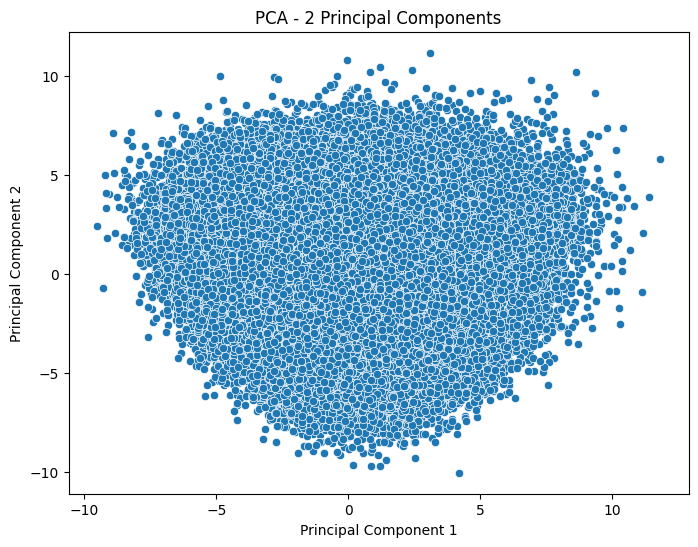

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

train_df_dr = train_df.copy()
train_df_dr = train_df_dr.drop(columns=['id'])

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(train_df_dr)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot the principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA - 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [11]:
def get_groups(N):
    q = N // 3
    r = N % 3
    if r == 0:
        return q
    elif r >= 1:
        return q + 1

In [12]:
def grouping(col_df, N):
    return ['low' if i <= get_groups(N) else 'intermediate' if i <= get_groups(N) * 2 else 'high' for i in col_df]

In [13]:
import math
def get_features(df, is_train=True):
    new_df = df.copy()
    new_df['EnvironmentalStress'] =  new_df['Deforestation'] + new_df['Siltation'] + new_df['WetlandLoss']
    new_df['InfrastructureVulnerability'] =  new_df['DeterioratingInfrastructure'] + new_df['DrainageSystems'] + new_df['DamsQuality']
    new_df['DisasterRisk'] =  new_df['IneffectiveDisasterPreparedness'] + new_df['InadequatePlanning'] + new_df['PoliticalFactors']
    
    N_Urbanization = new_df['Urbanization'].max()
    new_df['UrbanizationGroup'] = grouping(new_df['Urbanization'], N_Urbanization)
    
    N_PopulationScore = new_df['PopulationScore'].max()
    new_df['PopulationScoreGroup'] = grouping(new_df['PopulationScore'], N_PopulationScore)
    
    N_MonsoonIntensity = new_df['MonsoonIntensity'].max()
    new_df['MonsoonIntensityGroup'] = grouping(new_df['MonsoonIntensity'], N_MonsoonIntensity)
    
    N_TopographyDrainage = new_df['TopographyDrainage'].max()
    new_df['TopographyDrainageGroup'] = grouping(new_df['TopographyDrainage'], N_TopographyDrainage)
    
    N_RiverManagement = new_df['RiverManagement'].max()
    new_df['RiverManagementGroup'] = grouping(new_df['RiverManagement'], N_RiverManagement)

    N_Deforestation = new_df['Deforestation'].max()
    new_df['DeforestationGroup'] = grouping(new_df['Deforestation'], N_Deforestation)

    N_DamsQuality = new_df['DamsQuality'].max()
    new_df['DamsQualityGroup'] = grouping(new_df['DamsQuality'], N_DamsQuality)

    N_Siltation = new_df['Siltation'].max()
    new_df['SiltationGroup'] = grouping(new_df['Siltation'], N_Siltation)

    N_IneffectiveDisasterPreparedness = new_df['IneffectiveDisasterPreparedness'].max()
    new_df['IneffectiveDisasterPreparednessGroup'] = grouping(new_df['IneffectiveDisasterPreparedness'], N_IneffectiveDisasterPreparedness)

    N_DrainageSystems = new_df['DrainageSystems'].max()
    new_df['DrainageSystemsGroup'] = grouping(new_df['DrainageSystems'], N_DrainageSystems)

    N_Landslides = new_df['Landslides'].max()
    new_df['LandslidesGroup'] = grouping(new_df['Landslides'], N_Landslides)

    N_Watersheds = new_df['Watersheds'].max()
    new_df['WatershedsGroup'] = grouping(new_df['Watersheds'], N_Watersheds)

    N_DeterioratingInfrastructure = new_df['DeterioratingInfrastructure'].max()
    new_df['DeterioratingInfrastructureGroup'] = grouping(new_df['DeterioratingInfrastructure'], N_DeterioratingInfrastructure)

    N_WetlandLoss = new_df['WetlandLoss'].max()
    new_df['WetlandLossGroup'] = grouping(new_df['WetlandLoss'], N_WetlandLoss)

    N_InadequatePlanning = new_df['InadequatePlanning'].max()
    new_df['InadequatePlanningGroup'] = grouping(new_df['InadequatePlanning'], N_InadequatePlanning)

    N_PoliticalFactors = new_df['PoliticalFactors'].max()
    new_df['PoliticalFactorsGroup'] = grouping(new_df['PoliticalFactors'], N_PoliticalFactors)

    N_ClimateChange = new_df['ClimateChange'].max()
    new_df['ClimateChangeGroup'] = grouping(new_df['ClimateChange'], N_ClimateChange)
    
    N_AgriculturalPractices = new_df['AgriculturalPractices'].max()
    new_df['AgriculturalPracticesGroup'] = grouping(new_df['AgriculturalPractices'], N_AgriculturalPractices)
    
    N_Encroachments = new_df['Encroachments'].max()
    new_df['EncroachmentsGroup'] = grouping(new_df['Encroachments'], N_Encroachments)
    
    N_CoastalVulnerability = new_df['CoastalVulnerability'].max()
    new_df['CoastalVulnerabilityGroup'] = grouping(new_df['CoastalVulnerability'], N_CoastalVulnerability)
    
    new_df['FloodRisk'] = 0.3 * new_df['MonsoonIntensity'] + 0.2 * new_df['TopographyDrainage'] + 0.5 * new_df['RiverManagement']
    new_df['EnvironmentalDegradation'] = 0.4 * new_df['Deforestation'] + 0.3 * new_df['Siltation'] + 0.3 * new_df['WetlandLoss']

    if(is_train):
        # Move the Rings column to the last column place
        rings = new_df['FloodProbability']
        new_df = new_df.drop(columns=['FloodProbability'])
        new_df['FloodProbability'] = rings
    return new_df

In [14]:
new_train_df = get_features(train_df)
new_train_df

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,WetlandLossGroup,InadequatePlanningGroup,PoliticalFactorsGroup,ClimateChangeGroup,AgriculturalPracticesGroup,EncroachmentsGroup,CoastalVulnerabilityGroup,FloodRisk,EnvironmentalDegradation,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,low,intermediate,low,low,low,low,low,5.6,5.6,0.445
1,1,6,7,4,4,8,8,3,5,4,...,low,low,low,intermediate,low,low,low,5.2,4.0,0.450
2,2,6,5,6,7,3,7,1,5,4,...,low,low,low,intermediate,low,low,low,5.8,4.9,0.530
3,3,3,4,6,5,4,8,4,7,6,...,low,intermediate,low,intermediate,low,intermediate,low,4.7,5.6,0.535
4,4,5,3,2,6,4,4,3,3,3,...,low,low,low,low,low,low,low,3.1,3.9,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,3,3,4,10,4,5,5,7,10,...,low,low,low,low,intermediate,low,intermediate,3.5,7.3,0.495
1117953,1117953,2,2,4,3,9,5,8,1,3,...,intermediate,low,low,low,low,low,low,3.0,4.2,0.480
1117954,1117954,7,3,9,4,6,5,9,1,3,...,low,low,low,low,low,low,low,7.2,3.4,0.485
1117955,1117955,7,3,3,7,5,2,3,4,6,...,low,low,low,low,low,low,intermediate,4.2,6.1,0.495


In [15]:
new_train_df.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'EnvironmentalStress',
       'InfrastructureVulnerability', 'DisasterRisk', 'UrbanizationGroup',
       'PopulationScoreGroup', 'MonsoonIntensityGroup',
       'TopographyDrainageGroup', 'RiverManagementGroup', 'DeforestationGroup',
       'DamsQualityGroup', 'SiltationGroup',
       'IneffectiveDisasterPreparednessGroup', 'DrainageSystemsGroup',
       'LandslidesGroup', 'WatershedsGroup',
       'DeterioratingInfrastructureGroup', 'WetlandLossGroup',
       'InadequatePlanningGroup', 'PoliticalFactorsGroup',
       'ClimateChangeGroup', 'Agri

In [16]:
import matplotlib.pyplot as plt

def pie_chart(df, label):
    # Labels and counts
    counts = df.value_counts()

    # Plotting the pie chart
    plt.figure(figsize=(5, 5))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['#3487ff', '#73acff', '#a1c7ff'])
    plt.title(label)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

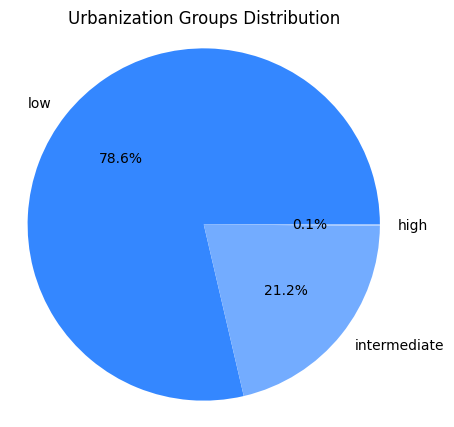

In [17]:
pie_chart(new_train_df['UrbanizationGroup'], 'Urbanization Groups Distribution')

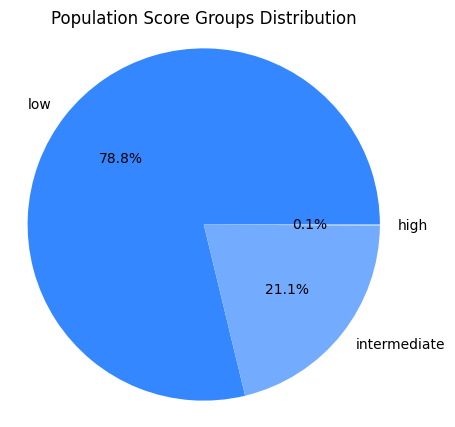

In [18]:
pie_chart(new_train_df['PopulationScoreGroup'], 'Population Score Groups Distribution')

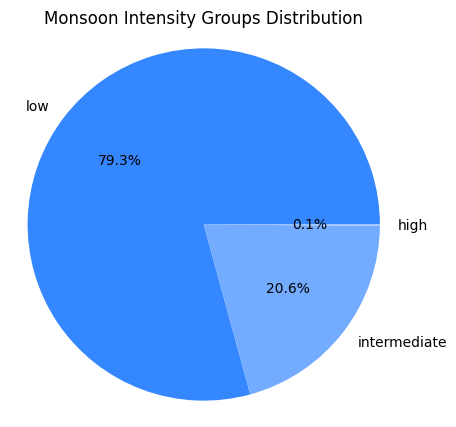

In [19]:
pie_chart(new_train_df['MonsoonIntensityGroup'], 'Monsoon Intensity Groups Distribution')

In [20]:
def corr_matrix(cols):
    # Correlation matrix
    import seaborn as sns
    train_df_copy = new_train_df[cols].copy()
    corr_matrix = train_df_copy.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix Heatmap')
    plt.show()

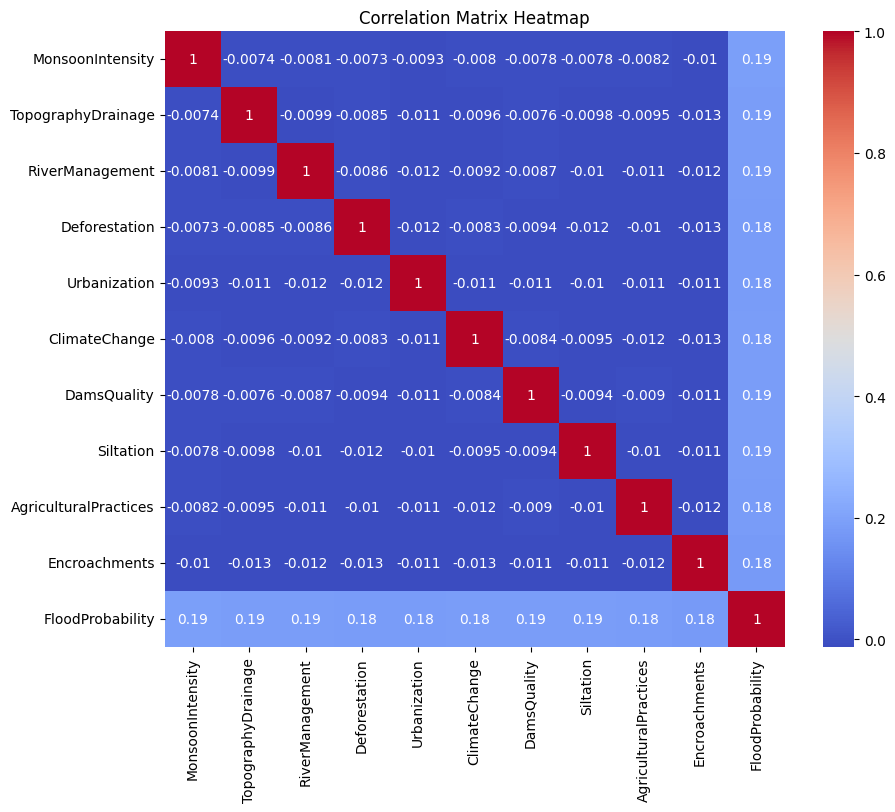

In [21]:
corr_matrix(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments', 'FloodProbability'])

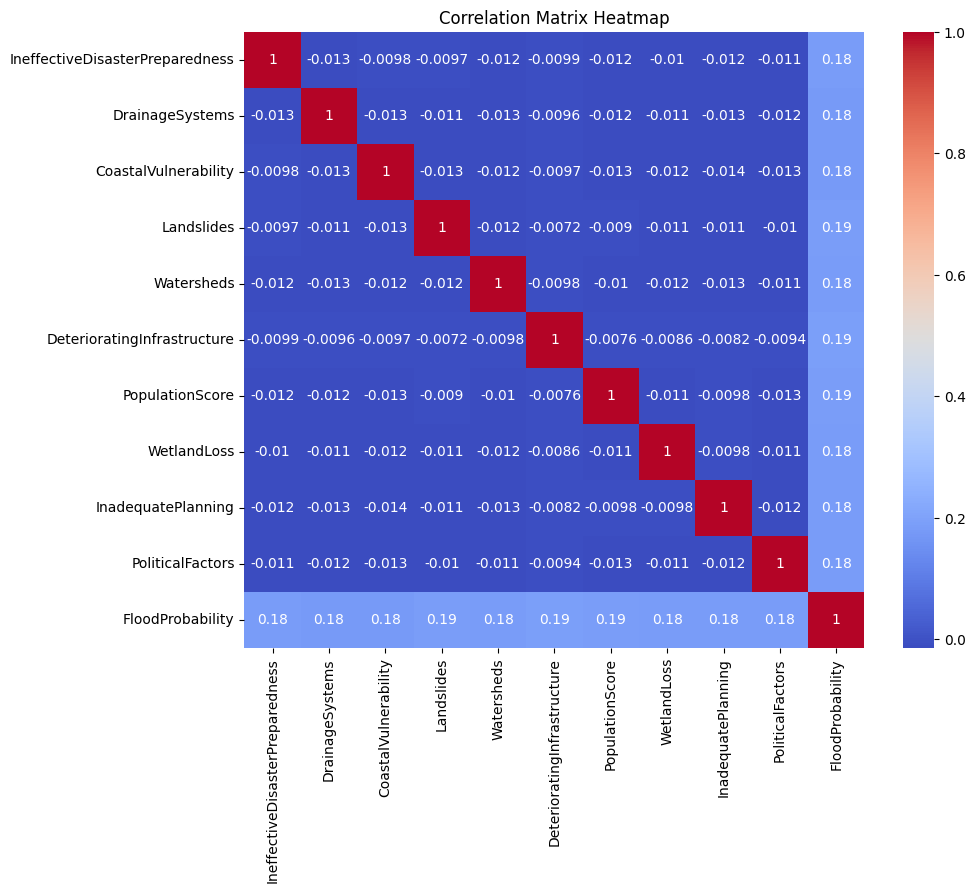

In [22]:
corr_matrix(['IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'])

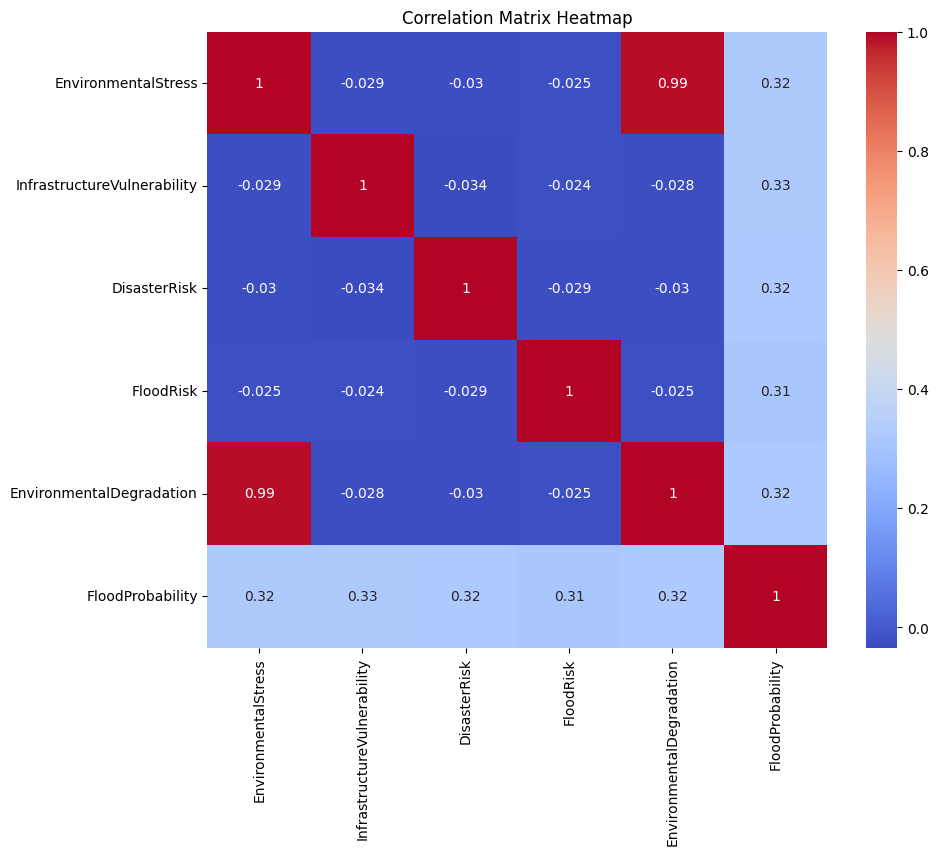

In [23]:
corr_matrix(['EnvironmentalStress', 'InfrastructureVulnerability', 'DisasterRisk', 'FloodRisk', 'EnvironmentalDegradation', 'FloodProbability'])

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

def preprocessing(df, is_train=True):

    numerical_features = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
                           'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
                           'Siltation', 'AgriculturalPractices', 'Encroachments',
                           'IneffectiveDisasterPreparedness', 'DrainageSystems',
                           'CoastalVulnerability', 'Landslides', 'Watersheds',
                           'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
                           'InadequatePlanning', 'PoliticalFactors', 'EnvironmentalStress',
                           'InfrastructureVulnerability', 'DisasterRisk', 'FloodRisk', 'EnvironmentalDegradation']
    categorical_features = ['UrbanizationGroup','PopulationScoreGroup', 'MonsoonIntensityGroup',
                            'TopographyDrainageGroup', 'RiverManagementGroup', 'DeforestationGroup',
                            'DamsQualityGroup', 'SiltationGroup',
                            'IneffectiveDisasterPreparednessGroup', 'DrainageSystemsGroup',
                            'LandslidesGroup', 'WatershedsGroup',
                            'DeterioratingInfrastructureGroup', 'WetlandLossGroup',
                            'InadequatePlanningGroup', 'PoliticalFactorsGroup',
                            'ClimateChangeGroup', 'AgriculturalPracticesGroup',
                            'EncroachmentsGroup', 'CoastalVulnerabilityGroup']
    
    numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    
    pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
    df_transformed = pipeline.fit_transform(df)
    
    columns_transformed = numerical_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features))
    df_transformed = pd.DataFrame(df_transformed, columns=columns_transformed)
    
    df_transformed = pd.concat([pd.DataFrame(df[['id']], columns=['id']), df_transformed], axis=1) 
    
    if(is_train):
        df_transformed = pd.concat([df_transformed, pd.DataFrame(df['FloodProbability'], columns=['FloodProbability']) ], axis=1) 
        
    return df_transformed

In [25]:
processed_df = preprocessing(new_train_df)
processed_df

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,AgriculturalPracticesGroup_high,AgriculturalPracticesGroup_intermediate,AgriculturalPracticesGroup_low,EncroachmentsGroup_high,EncroachmentsGroup_intermediate,EncroachmentsGroup_low,CoastalVulnerabilityGroup_high,CoastalVulnerabilityGroup_intermediate,CoastalVulnerabilityGroup_low,FloodProbability
0,0,0.038198,1.467769,0.021561,1.490363,0.507578,-0.453941,-0.458881,-0.933107,-0.939124,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.445
1,1,0.524488,0.990186,-0.461022,-0.459251,1.467552,1.489938,-0.938943,0.034951,-0.455692,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.450
2,2,0.524488,0.035021,0.504143,1.002959,-0.932383,1.003968,-1.899068,0.034951,-0.455692,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.530
3,3,-0.934382,-0.442562,0.504143,0.028152,-0.452396,1.489938,-0.458881,1.003010,0.511171,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.535
4,4,0.038198,-0.920145,-1.426186,0.515556,-0.452396,-0.453941,-0.938943,-0.933107,-0.939124,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,1117952,-0.934382,-0.920145,-0.461022,2.465169,-0.452396,0.032029,0.021182,1.003010,2.444899,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.495
1117953,1117953,-1.420672,-1.397727,-0.461022,-0.946654,1.947539,0.032029,1.461369,-1.901166,-0.939124,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.480
1117954,1117954,1.010778,-0.920145,1.951890,-0.459251,0.507578,0.032029,1.941432,-1.901166,-0.939124,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.485
1117955,1117955,1.010778,-0.920145,-0.943604,1.002959,0.027591,-1.425881,-0.938943,-0.449078,0.511171,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.495


In [26]:
processed_df.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'EnvironmentalStress',
       'InfrastructureVulnerability', 'DisasterRisk', 'FloodRisk',
       'EnvironmentalDegradation', 'UrbanizationGroup_high',
       'UrbanizationGroup_intermediate', 'UrbanizationGroup_low',
       'PopulationScoreGroup_high', 'PopulationScoreGroup_intermediate',
       'PopulationScoreGroup_low', 'MonsoonIntensityGroup_high',
       'MonsoonIntensityGroup_intermediate', 'MonsoonIntensityGroup_low',
       'TopographyDrainageGroup_high', 'TopographyDrainageGroup_intermediate',
       'TopographyDrainageGroup_low', 'Rive

In [27]:
from sklearn.model_selection import train_test_split
X_columns = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'EnvironmentalStress',
       'InfrastructureVulnerability', 'DisasterRisk', 'FloodRisk',
       'EnvironmentalDegradation', 'UrbanizationGroup_high',
       'UrbanizationGroup_intermediate', 'UrbanizationGroup_low',
       'PopulationScoreGroup_high', 'PopulationScoreGroup_intermediate',
       'PopulationScoreGroup_low', 'MonsoonIntensityGroup_high',
       'MonsoonIntensityGroup_intermediate', 'MonsoonIntensityGroup_low',
       'TopographyDrainageGroup_high', 'TopographyDrainageGroup_intermediate',
       'TopographyDrainageGroup_low', 'RiverManagementGroup_high',
       'RiverManagementGroup_intermediate', 'RiverManagementGroup_low',
       'DeforestationGroup_high', 'DeforestationGroup_intermediate',
       'DeforestationGroup_low', 'DamsQualityGroup_high',
       'DamsQualityGroup_intermediate', 'DamsQualityGroup_low',
       'SiltationGroup_high', 'SiltationGroup_intermediate',
       'SiltationGroup_low', 'IneffectiveDisasterPreparednessGroup_high',
       'IneffectiveDisasterPreparednessGroup_intermediate',
       'IneffectiveDisasterPreparednessGroup_low', 'DrainageSystemsGroup_high',
       'DrainageSystemsGroup_intermediate', 'DrainageSystemsGroup_low',
       'LandslidesGroup_high', 'LandslidesGroup_intermediate',
       'LandslidesGroup_low', 'WatershedsGroup_high',
       'WatershedsGroup_intermediate', 'WatershedsGroup_low',
       'DeterioratingInfrastructureGroup_high',
       'DeterioratingInfrastructureGroup_intermediate',
       'DeterioratingInfrastructureGroup_low', 'WetlandLossGroup_high',
       'WetlandLossGroup_intermediate', 'WetlandLossGroup_low',
       'InadequatePlanningGroup_high', 'InadequatePlanningGroup_intermediate',
       'InadequatePlanningGroup_low', 'PoliticalFactorsGroup_high',
       'PoliticalFactorsGroup_intermediate', 'PoliticalFactorsGroup_low',
       'ClimateChangeGroup_high', 'ClimateChangeGroup_intermediate',
       'ClimateChangeGroup_low', 'AgriculturalPracticesGroup_high',
       'AgriculturalPracticesGroup_intermediate',
       'AgriculturalPracticesGroup_low', 'EncroachmentsGroup_high',
       'EncroachmentsGroup_intermediate', 'EncroachmentsGroup_low',
       'CoastalVulnerabilityGroup_high',
       'CoastalVulnerabilityGroup_intermediate',
       'CoastalVulnerabilityGroup_low']
y_columns = ['FloodProbability']
X = processed_df[X_columns]
y = processed_df[y_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.model_selection import GridSearchCV

def findBestParams(model, params, X, y):
    grid_search = GridSearchCV(model, params, cv=5, scoring='r2', verbose=10)

    # Fit the GridSearchCV object to the data
    grid_search.fit(X, y.values.ravel())

    # Get the best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Display the results
    print("Best Hyperparameters:", best_params)
    return best_model

In [29]:
from sklearn.linear_model import Lasso

# Define the parameter grid for GridSearch
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.3, 0.5, 1]
}
lasso_model = findBestParams(Lasso(), param_grid, X_train, y_train)
lasso_model.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START alpha=0.001.................................................
[CV 1/5; 1/6] END ..................alpha=0.001;, score=0.838 total time=  22.9s
[CV 2/5; 1/6] START alpha=0.001.................................................
[CV 2/5; 1/6] END ..................alpha=0.001;, score=0.839 total time=  17.6s
[CV 3/5; 1/6] START alpha=0.001.................................................
[CV 3/5; 1/6] END ..................alpha=0.001;, score=0.839 total time=  16.6s
[CV 4/5; 1/6] START alpha=0.001.................................................
[CV 4/5; 1/6] END ..................alpha=0.001;, score=0.838 total time=  15.8s
[CV 5/5; 1/6] START alpha=0.001.................................................
[CV 5/5; 1/6] END ..................alpha=0.001;, score=0.839 total time=  16.8s
[CV 1/5; 2/6] START alpha=0.01..................................................
[CV 1/5; 2/6] END ...................alpha=0.01;,

Lasso(alpha=0.001)

In [30]:
lasso_model_pred = lasso_model.predict(X_test)
lasso_model_pred

array([0.53134991, 0.57818885, 0.52122738, ..., 0.53353711, 0.49521291,
       0.50471809])

In [31]:
from sklearn.metrics import r2_score

def get_metrics(y_pred, y_true):
    r2_score_value = r2_score(y_true, y_pred)
    print(f"r2 score: {r2_score_value}")

In [32]:
get_metrics(lasso_model_pred, y_test)

r2 score: 0.8387950865743458


In [33]:
from sklearn.linear_model import Ridge

# Define the parameter grid for GridSearch
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 5, 10],
}
ridge_model = findBestParams(Ridge(), param_grid, X_train, y_train)
ridge_model.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START alpha=0.001.................................................
[CV 1/5; 1/8] END ..................alpha=0.001;, score=0.845 total time=   1.3s
[CV 2/5; 1/8] START alpha=0.001.................................................
[CV 2/5; 1/8] END ..................alpha=0.001;, score=0.846 total time=   1.3s
[CV 3/5; 1/8] START alpha=0.001.................................................
[CV 3/5; 1/8] END ..................alpha=0.001;, score=0.845 total time=   1.4s
[CV 4/5; 1/8] START alpha=0.001.................................................
[CV 4/5; 1/8] END ..................alpha=0.001;, score=0.845 total time=   1.2s
[CV 5/5; 1/8] START alpha=0.001.................................................
[CV 5/5; 1/8] END ..................alpha=0.001;, score=0.845 total time=   1.2s
[CV 1/5; 2/8] START alpha=0.01..................................................
[CV 1/5; 2/8] END ...................alpha=0.01;,

Ridge(alpha=10)

In [34]:
ridge_pred = ridge_model.predict(X_test)
ridge_pred

array([0.53388522, 0.58505726, 0.52272152, ..., 0.53386931, 0.49439534,
       0.50611007])

In [35]:
get_metrics(ridge_pred, y_test)

r2 score: 0.8450819867989163


In [36]:
from sklearn.linear_model import ElasticNet

# Define the parameter grid for GridSearch
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.3, 0.5, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9]
}
en_model = findBestParams(ElasticNet(), param_grid, X_train, y_train)
en_model.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5; 1/21] START alpha=0.001, l1_ratio=0.1..................................
[CV 1/5; 1/21] END ...alpha=0.001, l1_ratio=0.1;, score=0.845 total time=  37.8s
[CV 2/5; 1/21] START alpha=0.001, l1_ratio=0.1..................................
[CV 2/5; 1/21] END ...alpha=0.001, l1_ratio=0.1;, score=0.845 total time=  32.8s
[CV 3/5; 1/21] START alpha=0.001, l1_ratio=0.1..................................
[CV 3/5; 1/21] END ...alpha=0.001, l1_ratio=0.1;, score=0.845 total time=  29.1s
[CV 4/5; 1/21] START alpha=0.001, l1_ratio=0.1..................................
[CV 4/5; 1/21] END ...alpha=0.001, l1_ratio=0.1;, score=0.844 total time=  18.8s
[CV 5/5; 1/21] START alpha=0.001, l1_ratio=0.1..................................
[CV 5/5; 1/21] END ...alpha=0.001, l1_ratio=0.1;, score=0.845 total time=  17.8s
[CV 1/5; 2/21] START alpha=0.001, l1_ratio=0.5..................................
[CV 1/5; 2/21] END ...alpha=0.001, l1_ratio=0.5

ElasticNet(alpha=0.001, l1_ratio=0.1)

In [37]:
en_pred = en_model.predict(X_test)
en_pred

array([0.53361007, 0.58449738, 0.52246423, ..., 0.53379526, 0.49424606,
       0.50573932])

In [38]:
get_metrics(en_pred, y_test)

r2 score: 0.8447991305986086


In [39]:
import lightgbm as lgb

# Define the parameter grid for GridSearch
param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.001, 0.01, 0.1, 1, 10],
    'n_estimators': [100, 200, 500]
}

lgbm_model = findBestParams(lgb.LGBMRegressor(), param_grid, X_train, y_train)
lgbm_model.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5; 1/30] START learning_rate=0.001, n_estimators=100, num_leaves=31.......
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.113703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 715492, number of used features: 85
[LightGBM] [Info] Start training from score 0.504504
[CV 1/5; 1/30] END learning_rate=0.001, n_estimators=100, num_leaves=31;, score=0.057 total time=   5.8s
[CV 2/5; 1/30] START learning_rate=0.001, n_estimators=100, num_leaves=31.......
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 913
[Light

LGBMRegressor(n_estimators=500)

In [40]:
lgbm_pred = lgbm_model.predict(X_test)
lgbm_pred

array([0.53793476, 0.58857056, 0.51691824, ..., 0.5330083 , 0.49502553,
       0.51204074])

In [41]:
get_metrics(lgbm_pred, y_test)

r2 score: 0.840855788791078


In [42]:
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid for GridSearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rfr_model = findBestParams(RandomForestRegressor(), param_grid, X_train, y_train)
rfr_model.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5; 1/648] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 1/648] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.2s
[CV 2/5; 1/648] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 1/648] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.2s
[CV 3/5; 1/648] START bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 1/648] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.2s
[CV 4/5; 1/648] START bootstrap=True, max_depth=None, max_featu

: 

In [ ]:
rfr_pred = rfr_model.predict(X_test)
rfr_pred

In [ ]:
get_metrics(rfr_pred, y_test)

In [ ]:
test_df = get_features(test_df, False)
test_df

In [ ]:
test_processed_df = preprocessing(test_df, False)
test_processed_df

In [ ]:
def get_submission(y_pred, id_column, target_cols, filename):
    df = pd.DataFrame(data=y_pred, columns=target_cols)
    df["id"] = id_column
    df = df[['id', 'FloodProbability']]
    df.to_csv('./submission/'+filename+'.csv', index=False)
    print(df)

In [ ]:
lasso_pred = lasso_model.predict(test_processed_df[X_columns])
lasso_pred = [abs(x) for x in lasso_pred]

In [ ]:
ridge_pred = ridge_model.predict(test_processed_df[X_columns])
ridge_pred = [abs(x) for x in ridge_pred]

In [ ]:
en_pred = ridge_model.predict(test_processed_df[X_columns])
en_pred = [abs(x) for x in en_pred]

In [ ]:
lgbm_pred = lgbm_model.predict(test_processed_df[X_columns])
lgbm_pred = [abs(x) for x in lgbm_pred]

In [ ]:
rfr_pred = rfr_model.predict(test_processed_df[X_columns])
rfr_pred = [abs(x) for x in rfr_pred]

In [ ]:
get_submission(lasso_pred, test_processed_df["id"], ["FloodProbability"], "lasso_pred")

In [ ]:
get_submission(ridge_pred, test_processed_df["id"], ["FloodProbability"], "ridge_pred")

In [ ]:
get_submission(en_pred, test_processed_df["id"], ["FloodProbability"], "en_pred")

In [ ]:
get_submission(lgbm_pred, test_processed_df["id"], ["FloodProbability"], "lgbm_pred")

In [ ]:
get_submission(rfr_pred, test_processed_df["id"], ["FloodProbability"], "rfr_pred")